# **Online Retail Data Visualisations**

## Objectives

* Create clear and insightful visualisations that help inform business decisions for this online retailer.

## Inputs

* The input can be found [here](../data_set/processed/processed_data.csv)
* This is a csv file contained the cleaned data outputted by the ETL process.

## Outputs

* There are some visualisations that have been saved as a png file
* These are stored in an [Images folder](../Images).

---

# Change Working Directory

We first need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/stephenbeese/GitHub/Online-Retail-Analysis/Online-Retail-Analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/stephenbeese/GitHub/Online-Retail-Analysis/Online-Retail-Analysis'

In [4]:
processed_data_dir = os.path.join(current_dir, 'data_set/processed') # path directory

# Imports

In [5]:
import pandas as pd # Import pandas
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn
import plotly.express as px # Import plotly
sns.set_style('whitegrid') # Set style for visuals

# Loading the data

In [6]:
df = pd.read_csv(os.path.join(processed_data_dir, 'processed_data.csv')) # Load data

df.head() # Display first 5 rows of data

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  \
0  2010-12-01 08:26:00       2.55       17850  United Kingdom   
1  2010-12-01 08:26:00       3.39       17850  United Kingdom   
2  2010-12-01 08:26:00       2.75       17850  United Kingdom   
3  2010-12-01 08:26:00       3.39       17850  United Kingdom   
4  2010-12-01 08:26:00       3.39       17850  United Kingdom   

   Total_Transaction_Value  
0                    15.30  
1                    20.34  
2                    22.00  
3                    20.34  
4                    20.34

---

# Monthly Trend Analysis

- Creating unique dataset copy to use for visualisations

In [7]:
df_monthlytrend = df.copy() # Create a copy of the dataframe

df_monthlytrend # Display dataframe

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
532100    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
532101    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
532102    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
532103    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
532104    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID         Country  \
0       2010-12-01 08:26:00       2.55       17850  United Kingdom   
1       2010-12-01 08:26:00       3.39       17850  United Kingdom   
2       2010-12-01 08:26:00       2.75       17850  United Kingdom   
3       2010-12-01 08:26:00       3.39       17850  United Kingdom   
4       2010-12-01 08:26:00       3.39       17850  United Kingdom   
...                     ...        ...         ...             ...   
532100  2011-12-09 12:50:00       0.85       12680          France   
532101  2011-12-09 12:50:00       2.10       12680          France   
532102  2011-12-09 12:50:00       4.15       12680          France   
532103  2011-12-09 12:50:00       4.15       12680          France   
532104  2011-12-09 12:50:00       4.95       12680          France   

        Total_Transaction_Value  
0                         15.30  
1                         20.34  
2                         22.00  
3                         20.34  
4                         20.34  
...                         ...  
532100                    10.20  
532101                    12.60  
532102                    16.60  
532103                    16.60  
532104                    14.85  

[532105 rows x 9 columns]

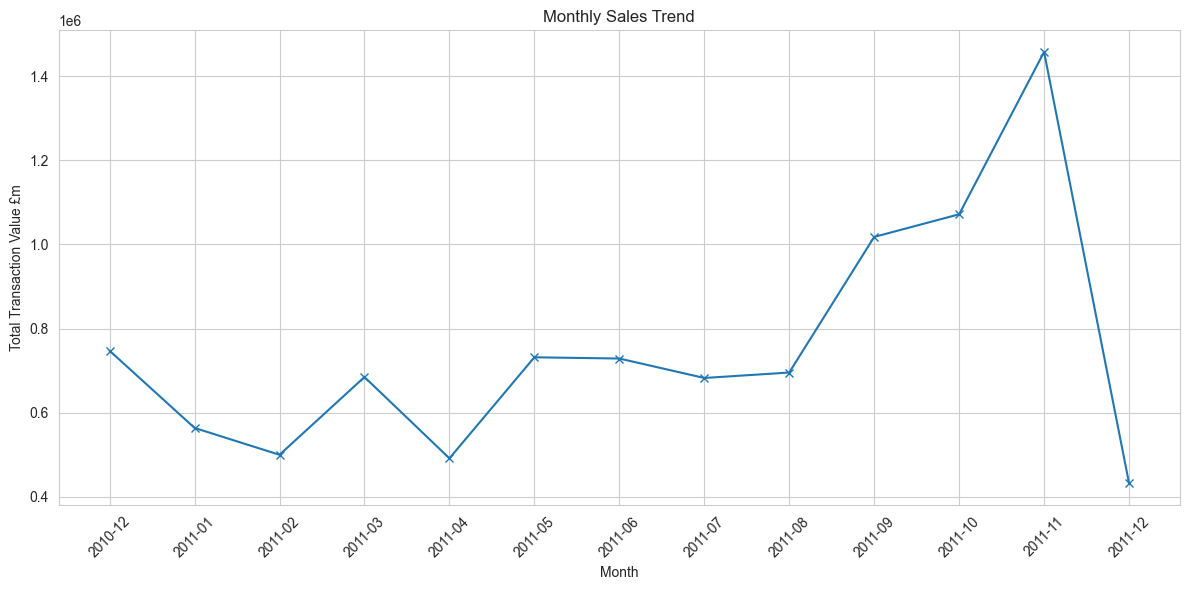

In [8]:
df_monthlytrend['InvoiceDate'] = pd.to_datetime(df_monthlytrend['InvoiceDate']) #convert into datetime format

df_monthlytrend['Month'] = df_monthlytrend['InvoiceDate'].dt.to_period('M').astype(str) #converting the format to just year and month

monthly_sales = df_monthlytrend.groupby('Month')['Total_Transaction_Value'].sum().reset_index() #grouping month with total transaction value per month

plt.figure(figsize=(12, 6)) #size
plt.plot(monthly_sales['Month'], monthly_sales['Total_Transaction_Value'], marker='x') #plot line graph with the marker of x at each month point
plt.title('Monthly Sales Trend') #title
plt.xlabel('Month') #label
plt.ylabel('Total Transaction Value £m') #label
plt.xticks(rotation=45) #rotate label
plt.tight_layout()
plt.show()

The above chart illustrates the monthly total transaction values from December 2010 through December 2011.

## Key insights:

- There is a decline in January 2011, likely reflecting a post-holiday slowdown after seasonal shopping in December.

- Sales remain relatively flat between Q1-Q2 (Jan - June 2011) to slightly increasing, hovering between £0.5m–£0.75m. The pattern shows moderate recovery, but with some dips. This may be due to seasonal or inventory cycles.

- From July to August 2011, sales stabilise, however September sees a sharp increase with continued growth in October and significant peak in November 2011. November reaches the highest point above £1.5m.

- The second half of 2011 shows much stronger performance than the first.

- The November 2011 spike is a key highlight which suggest pre-holiday shopping/ promotional end of year events and customers preparing for the end of year holiday (Christmas/black friday and similar events). December seems to drop heavily which may be due to a cool down period for customers as majority of the shopping has been completed for the season. 

- Possible reasons in decline may be due to seasonality habits, stock out issues, operational disruptions (logistics and distribution closures and delays).

### Conclusion:

The trend analysis chart reveals a gradual buildup in sales activity throughout the year, peaking in a sharp surge during Q4 2011, particularly in November, which may correspond with seasonal or promotional factors. Companies tend to run aggressive marketing campaigns and discounts in the second half of the year to ensure inventory is cleared out, boost end of year financials and capture seasonal customers. 

Overall, the trend suggests a positive sales trajectory with strong year-end performance, indicating potential for future seasonal marketing opportunities and optimised inventory management.

---

# Top Product Analysis

In [9]:
df_product = df.copy() # Create a copy of the dataframe

df_product # Display dataframe

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
532100    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
532101    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
532102    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
532103    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
532104    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID         Country  \
0       2010-12-01 08:26:00       2.55       17850  United Kingdom   
1       2010-12-01 08:26:00       3.39       17850  United Kingdom   
2       2010-12-01 08:26:00       2.75       17850  United Kingdom   
3       2010-12-01 08:26:00       3.39       17850  United Kingdom   
4       2010-12-01 08:26:00       3.39       17850  United Kingdom   
...                     ...        ...         ...             ...   
532100  2011-12-09 12:50:00       0.85       12680          France   
532101  2011-12-09 12:50:00       2.10       12680          France   
532102  2011-12-09 12:50:00       4.15       12680          France   
532103  2011-12-09 12:50:00       4.15       12680          France   
532104  2011-12-09 12:50:00       4.95       12680          France   

        Total_Transaction_Value  
0                         15.30  
1                         20.34  
2                         22.00  
3                         20.34  
4                         20.34  
...                         ...  
532100                    10.20  
532101                    12.60  
532102                    16.60  
532103                    16.60  
532104                    14.85  

[532105 rows x 9 columns]

In order to identify the most popular products by sales volume so that inventory can be optimised.

In [10]:
top_products = df_product.groupby('Description')['Quantity'].sum().nlargest(10) # Group by product description and sum quantity, then get the top 10 largest
top_products #top 10 products based on quantity sold


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64

In [11]:
# Top 10 products by quantity
top_products_list = [
    "WORLD WAR 2 GLIDERS ASSTD DESIGNS",
    "JUMBO BAG RED RETROSPOT",
    "POPCORN HOLDER",
    "ASSORTED COLOUR BIRD ORNAMENT",
    "PACK OF 72 RETROSPOT CAKE CASES",
    "WHITE HANGING HEART T-LIGHT HOLDER",
    "RABBIT NIGHT LIGHT",
    "MINI PAINT SET VINTAGE",
    "PACK OF 12 LONDON TISSUES",
    "PACK OF 60 PINK PAISLEY CAKE CASES"
]
# Filter the original dataframe to include only these top products
filtered_df = df[df["Description"].isin(top_products_list)]
filtered_df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER',
       'ASSORTED COLOUR BIRD ORNAMENT', 'PACK OF 72 RETROSPOT CAKE CASES',
       'PACK OF 60 PINK PAISLEY CAKE CASES', 'JUMBO BAG RED RETROSPOT',
       'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'RABBIT NIGHT LIGHT',
       'POPCORN HOLDER'], dtype=object)

In [12]:
# Calculate revenue for each product
top_products_revenue = filtered_df.groupby("Description")["Total_Transaction_Value"].sum().sort_values(ascending=False)

#create a comparison dataframe
comparison_df = pd.DataFrame({
    "Product Description": top_products_list,
    "Quantity Sold": top_products.reindex(top_products_list).values,
    "Revenue (£)": top_products_revenue.reindex(top_products_list).values
})
comparison_df # there are some NaN values because some products in the top 10 by quantity do not appear in the top 10 by revenue
                #so dropped those rows and now we compare only those products which are in both top 10 lists
comparison_df=comparison_df.dropna()

# Melt the dataframe for easier plotting with seaborn
comparison_melted = comparison_df.melt(
    id_vars="Product Description",
    value_vars=["Quantity Sold", "Revenue (£)"],
    var_name="Metric",
    value_name="Value"
    )

In [13]:
# Plotting the comparison using seaborn
fig = px.histogram(
    x=top_products.index,   # Descriptions
    y=top_products.values,  # Quantities
    title="Top 10 Products by Quantity",
    labels={"x": "Product Description", "y": "Total Quantity Sold"} 
)
fig.show()

![Top 10 Products by Quantity](../Images/Top_10_Products_by_Quantity.png)

---

## Analysis - Product Revenue Contribution
Identification of the products with the highest revenue contribution  to find the products driving growth.


In [14]:
# products with the highest revenue contribution
df_product.head()
top_rev = df_product.groupby('Description')['Total_Transaction_Value'].sum().nlargest(10)
fig = px.histogram(
    x=top_rev.index,   # Descriptions
    y=top_rev.values,  # Revenues
    title="Top 10 Products by Revenue",
    labels={"x": "Product Description", "y": "Total Revenue"}
)
fig.show()

![Top 10 Products by Revenue](../Images/Top_10_products_by_Revenue.png)

In [15]:
# Bar plot using Plotly Express
fig = px.bar(
    comparison_melted,
    x="Product Description",
    y="Value",
    color="Metric",
    barmode="group",  # side-by-side bars
    text="Value",
    title="Top 10 Products: Quantity vs Revenue"
)

# Customize the layout
fig.update_traces(texttemplate='%{text:.2f}', textposition="outside")
fig.update_layout(
    xaxis_title="Product Description",
    yaxis_title="Value",
    xaxis_tickangle=-45,
    legend_title="Metric"
)

fig.show()

![Top 10 Products: Quantity vs Revenue](../Images/Top_10_Products_by_Quantity_Vs_Revenue.png)

- It is inferred that the highest selling products are not necessarily the highest revenue generating products. This insight can help the business to balance inventory levels, ensuring that both high-demand and high-revenue products are adequately stocked to meet customer needs and maximise profitability.

---

## Price vs Quantity
Comparing unit price vs quantity sold to understand price sensitivity. Since the Unit Price is diffrerent in different countries, so the mean unit price for each product is used and aggregated dataset for the same. 


In [16]:
# Aggregate at product level
product_summary = df.groupby('Description').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',  # average price per product
    'Total_Transaction_Value': 'sum'  
}).reset_index()

product_summary.head()

Description  Quantity  UnitPrice  \
0   4 PURPLE FLOCK DINNER CANDLES       142   2.450513   
1   50'S CHRISTMAS GIFT BAG LARGE      1913   1.425231   
2               DOLLY GIRL BEAKER      2444   1.503539   
3     I LOVE LONDON MINI BACKPACK       388   4.616667   
4     I LOVE LONDON MINI RUCKSACK         1   4.150000   

   Total_Transaction_Value  
0                   285.70  
1                  2341.13  
2                  2877.50  
3                  1624.02  
4                     4.15

In [17]:
# Filter out products with non-positive revenue for bubble size
filtered_product_summary = product_summary[product_summary["Total_Transaction_Value"] > 0]

# Scatter plot with bubble size representing revenue
fig = px.scatter(
    filtered_product_summary,
    x="UnitPrice",
    y="Quantity",
    size="Total_Transaction_Value",  # bubble size = revenue
    color="Description",             # color by product
    hover_data=["Description"],      # show product name on hover
    title="Unit Price vs Quantity Sold"
)

# Customize the layout
fig.update_layout(
    xaxis_title="Unit Price (£)",
    yaxis_title="Total Quantity Sold"
)

fig.show()

![Unit Price vs Quantity Sold](../Images/unit_price_vs_quantity.png)

It is inferred from the scatter plot of given data there is negative correlation between unit price and quantity sold. This suggests that as the price of a product increases, the quantity sold tends to decrease, indicating that customers may be sensitive to price changes With higher prices potentially leading to lower sales volumes. This insight can help the business in pricing strategies and inventory management. At the same time, it is also observed that some products with higher unit prices still manage to achieve significant sales volumes, indicating that factors other than price, such as product quality, brand reputation, or customer loyalty, may also play a crucial role in driving sales. Overall, the scatter plot highlights the complex relationship between price and quantity sold, suggesting that businesses need to consider multiple factors when setting prices and developing sales strategies.

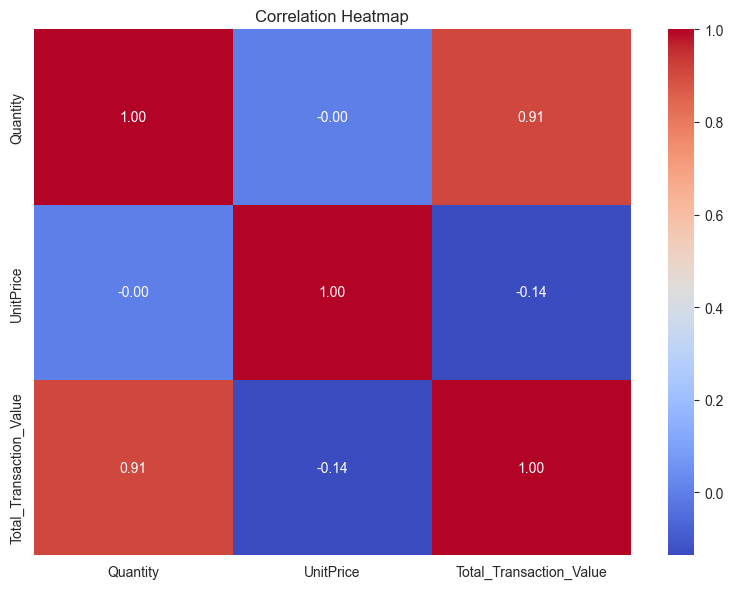

In [18]:
# Advanced Data Visualization
corr = df_product[['Quantity', 'UnitPrice', 'Total_Transaction_Value']].corr()

# Heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


---

## Identify High Value Customers
A scatterplot of Customer ID vs money spent so that high-value customers are easy to identify.

 

In [19]:
# Top 10 Customers by Revenue
top_customers = df_product.groupby('CustomerID')['Total_Transaction_Value'].sum().nlargest(10)

# Bar plot using Plotly Express
fig = px.bar(
    x=top_customers.index.astype(str),
    y=top_customers.values,  # Revenues / Total Transaction Value
    title="Top 10 Customers by Revenue",
    labels={"x": "Customer ID", "y": "Total Revenue"}
)

fig.show()

![Top 10 Customers by Revenue](../Images/Top_Customers_by_Revenue.png)

In [20]:
# Scatter plot using Plotly Express
fig = px.scatter(
	x=top_customers.index.astype(str),
	y=top_customers.values,
	title="Top 10 Customers by Revenue",
	labels={"x": "Customer ID", "y": "Total Revenue (£)"}
)

fig.show()

![Top 10 Customer by Revenue](../Images/top_10_customers_by_revenue_scatter.png)

From the scatter plot, it is evident that a small number of customers contribute significantly to the total revenue, indicating the presence of high-value customers. These customers have made substantial purchases, leading to higher total transaction values. On the other hand, the majority of customers have lower transaction values, suggesting that they may be occasional or low-frequency buyers. This insight can help the business focus on retaining and nurturing high-value customers through targeted marketing and personalized offers, while also exploring strategies to increase engagement and spending among lower-value customers. Overall, the scatter plot highlights the importance of customer segmentation and the need for tailored approaches to maximize revenue from different customer groups.

---

# Customer Spending Analysis

In [21]:
# Display floats with 2 decimal places and thousands separator
pd.set_option("display.float_format", "{:,.2f}".format)

# Copy the original dataframe
df_customer_spending = df.copy()

# Group by CustomerID to aggregate spending and transaction counts
df_customer_spending = df_customer_spending.groupby('CustomerID').agg({
    'Total_Transaction_Value': 'sum',   # sum of all transactions per customer
    'InvoiceNo': 'count'                # number of invoices (transactions) per customer
}).reset_index()

# Calculate average order value per customer
df_customer_spending['Avg_Order_Value'] = (
    df_customer_spending['Total_Transaction_Value'] / 
    df_customer_spending['InvoiceNo'].replace(0, pd.NA)
)

# Sort customers by Avg_Order_Value (lowest to highest)
df_customer_spending = df_customer_spending.sort_values(
    by='Avg_Order_Value', ascending=True
)

# Filter out customers with no valid spend or invalid averages
df_customer_spending = df_customer_spending[
    df_customer_spending['Total_Transaction_Value'] > 0
]
df_customer_spending = df_customer_spending[
    df_customer_spending['Avg_Order_Value'] > 0
]

# Format numbers nicely when displayed (2 decimals, commas for thousands)
df_customer_spending.style.format({
    "Total_Transaction_Value": "{:,.2f}",
    "Avg_Order_Value": "{:,.2f}"
})

# Convert CustomerID to string (useful if you want to treat them as categorical IDs)
df_customer_spending['CustomerID'] = df_customer_spending['CustomerID'].astype(str)

# Display customer spending dataframe
df_customer_spending


CustomerID  Total_Transaction_Value  InvoiceNo  Avg_Order_Value
211       12607                     0.00        202             0.00
1056      13762                     0.00         14             0.00
168       12558                     0.00         22             0.00
89        12454                     0.00         30             0.00
4200      18072                    12.24         34             0.36
...         ...                      ...        ...              ...
2517      15749                21,535.90         15         1,435.73
3090      16532                 6,748.80          4         1,687.20
601       13135                 3,096.00          1         3,096.00
2100      15195                 3,861.00          1         3,861.00
2024      15098                39,619.50          4         9,904.88

[4322 rows x 4 columns]

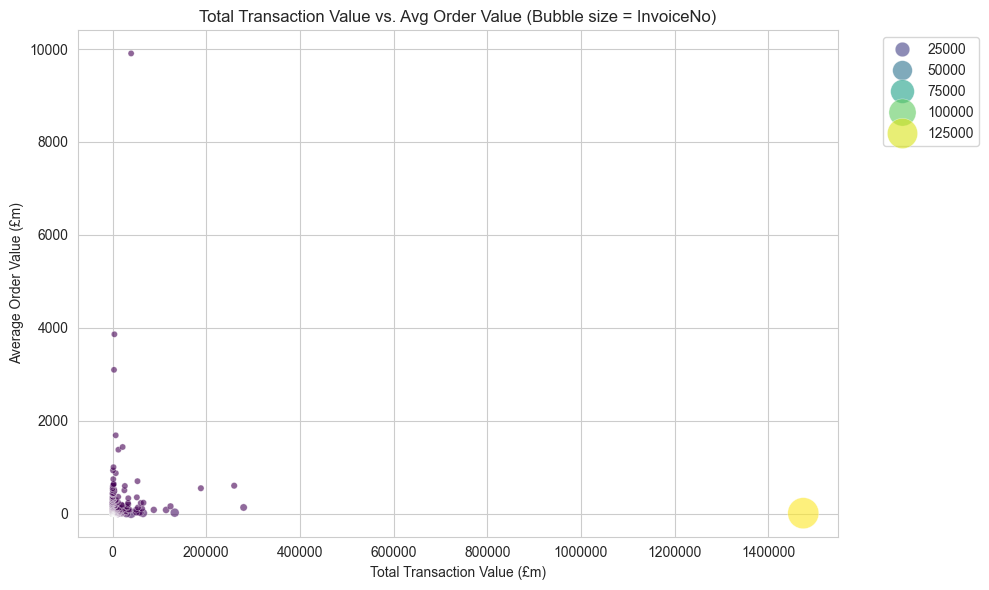

In [22]:
# Create a figure with specific size
plt.figure(figsize=(10, 6))

# Scatter plot with bubbles
sns.scatterplot(
    data=df_customer_spending,           # dataset
    x="Total_Transaction_Value",         # x-axis = total customer spend
    y="Avg_Order_Value",                 # y-axis = average order value
    size="InvoiceNo",                    # bubble size = number of invoices (frequency)
    sizes=(20, 500),                     # min and max bubble size
    alpha=0.6,                           # transparency (helps when points overlap)
    hue="InvoiceNo",                     # color scale also based on number of invoices
    palette="viridis"                    # colormap used for coloring bubbles
)

# Add chart title and axis labels
plt.title("Total Transaction Value vs. Avg Order Value (Bubble size = InvoiceNo)")
plt.xlabel("Total Transaction Value (£m)")
plt.ylabel("Average Order Value (£m)")

# Format axis numbers in plain style (no scientific notation)
plt.ticklabel_format(style="plain", axis="y")
plt.ticklabel_format(style="plain", axis="x")

# Move legend outside the plot for readability
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout so labels and legend don’t overlap
plt.tight_layout()

# Display the plot
plt.show()


# Key Insights
1. **Most customers are clustered towards the lower end of the spending spectrum.**
    - There is a clear trend of low Total Transaction Value and low Average Order Value
    - These are low-value, low-frequency buyers
    - They represent the bulk of customers but don’t contribute much individually.
2. **Some customers stand out with high Total_Transaction_Value but small bubbles**
    - High spend but few orders → big-ticket customers.
    - They may have placed just a handful of very large orders.
3. **Extreme Outliers**
    - A few customers have huge spend or unusually high average order values.
    - These outliers distort the scale — they’re probably “whale” customers.

### Business Implications

Segmentation Opportunities
- High-spend, low-frequency → nurture with personalized offers to increase frequency.
- Low-spend, high-frequency → reward loyalty, maybe cross-sell/upsell to lift order size.
- High-spend, high-frequency → VIPs, should be given premium treatment.

The scatter plot is difficult to interpret because a small number of outliers distort the scale. By removing the top 5% of customers, we can better visualise the majority and reveal meaningful patterns in customer behavior.

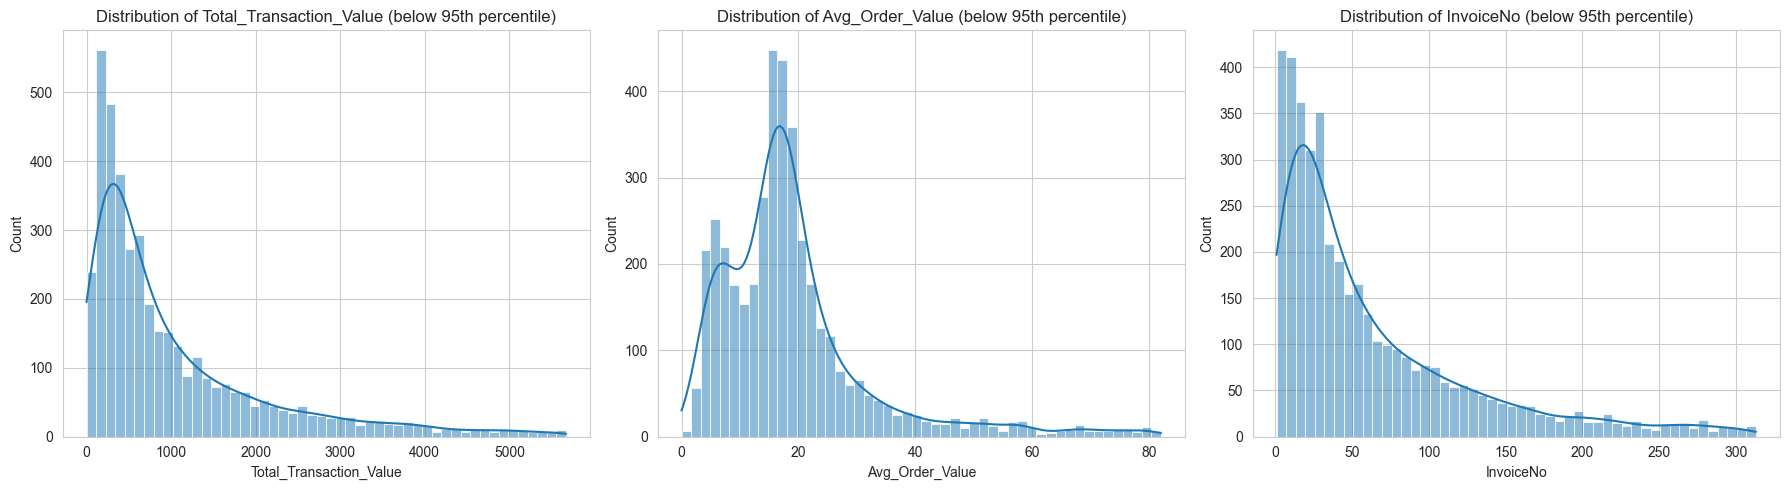

In [23]:
# Define the columns to plot
cols = ["Total_Transaction_Value", "Avg_Order_Value", "InvoiceNo"]

# Create a figure with 1 row and 3 subplots (side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through each metric and subplot axis
for ax, col in zip(axes, cols):
    sns.histplot(
        # Plot data below the 95th percentile to remove extreme outliers
        df_customer_spending[col][df_customer_spending[col] < df_customer_spending[col].quantile(0.95)], 
        bins=50,        # number of histogram bins
        kde=True,       # overlay Kernel Density Estimate (smooth curve)
        ax=ax           # plot on the given subplot axis
    )
    # Set a descriptive title for each subplot
    ax.set_title(f"Distribution of {col} (below 95th percentile)")

plt.tight_layout()

# Show the plot
plt.show()


## Key Insights
1. Total_Transaction_Value (left plot)
    - Heavily right-skewed, most customers spend less than £1000 in total
    - There is a long tail of higher spenders, trimming at 95% allows you to see a more consistent range with no extreme edgecases.
    - The majority of customers are low-to-moderate value, while a smaller set spend much more.
    - This supports the idea of a Pareto distribution (20% of customers drive most revenue).


2. Avg_Order_Value (middle plot)
    - There is a peak around £15-20 per order
    - Distribution has some spead into higher order sizes, though less common.
    - Typical basket size is small but there are distinct big average orders.
    - It may be worth profiling the users with big average orders as they may require different needs. For example these big spenders could be companies or organisations who's needs would differ from a more typical customer.

3. Invoice Frequency (right plot)
    - Most customers make a small number of purchases (<50)
    - There’s a smaller but meaningful group of repeat buyers with 100+ orders.
    - Retention/loyalty looks weak for the majority, but there’s a core group of highly engaged repeat customers worth focusing on.


### Business Implications
- The customer base is highly skewed. There are lots of small-value, low-frequency customers, with a minority of high-value or loyal ones
    - Low spend, low frequency → bulk of your base (occasional buyers).
    - High spend, low frequency → one-off “big-ticket” customers.
    - Low spend, high frequency → loyal but small-order buyers.
    - High spend, high frequency → VIPs.
- Growth opportunities lie in retaining/upselling the bulk of one-off buyers, and nurturing VIPs and repeat buyers to keep them engaged.


---

# Sales Analysis UK vs RoW

Below chart displays sales analysis from the UK vs the Rest of the World

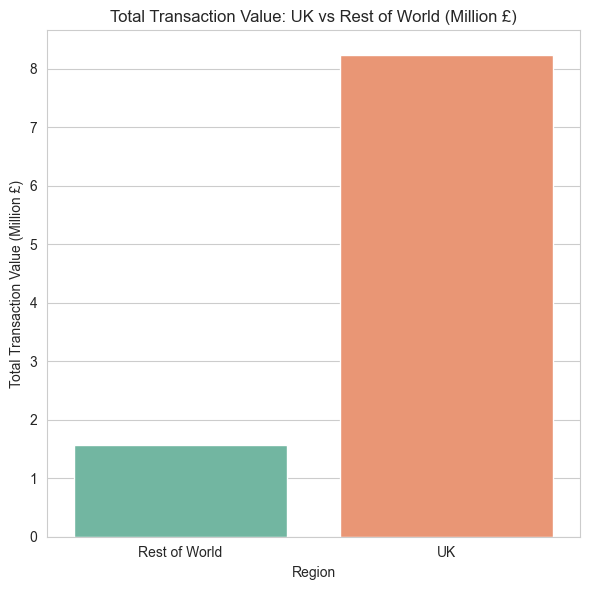

In [24]:
# Compare UK vs Rest of World Sales
country_sales = df.groupby('Country')['Total_Transaction_Value'].sum().reset_index() # Grouping country with total transaction value per country
country_sales['Region'] = country_sales['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Rest of World') # Create a new column 'Region' to classify countries
region_sales = country_sales.groupby('Region')['Total_Transaction_Value'].sum().reset_index() # Group by Region to get total sales per region
region_sales['Total_Transaction_Value_Million'] = region_sales['Total_Transaction_Value'] / 1_000_000 # Convert to millions

# Bar plot using seaborn
plt.figure(figsize=(6,6))
sns.barplot(data=region_sales, x='Region', y='Total_Transaction_Value_Million', palette='Set2', hue='Region')
plt.title('Total Transaction Value: UK vs Rest of World (Million £)')
plt.ylabel('Total Transaction Value (Million £)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


In [25]:
# Save the figure
plt.savefig("Images/uk_vs_rest_of_world.png")

<Figure size 640x480 with 0 Axes>

### Insights:
 
- The UK shows a higher transaction value of over £8 million.
- The rest of the world has a lower transaction value, just below £2 million.

### Conclusion:
The UK dominates in transaction value, contributing roughly five times more than the rest of the world. This highlights the UK as the primary market or source of revenue, with the other global contributions being comparatively smaller. There is potential for marketing campaigns aimed at the rest of the world to increase revenue, as well as opportunities for greater exposure within the UK, which would further strengthen earnings, since it remains the strongest market

---

# AM vs PM Comparisons


In [26]:
# Adding Hour and am_or_pm columns
am_or_pm = df.copy()
am_or_pm['Hour'] = am_or_pm['InvoiceDate'].str[11:13]
am_or_pm['AmPm'] = am_or_pm["Hour"].apply(lambda x: 'AM' if int(x) < 12 else 'PM')

In [27]:
# Create a pie chart for AM vs PM sales
ampm_sales = am_or_pm.groupby('AmPm')['Total_Transaction_Value'].sum().reset_index()
fig = px.pie(ampm_sales, values='Total_Transaction_Value', names='AmPm', title='Sales Distribution Am vs Pm')
fig.show()

![Sales Distribution Pie Chart](../Images/am_vs_pm_sales.png)

In [28]:
# Create a bar chart for sales by hour
hourly_sales = am_or_pm.groupby('Hour')['Total_Transaction_Value'].sum().reset_index()
fig = px.bar(hourly_sales,
             x='Hour',
             y='Total_Transaction_Value',
             title='Sales by Hour',
             labels={'Total_Transaction_Value': 'Total Sales',
                     'Hour': 'Hour of Day'})
fig.show()

![Sales by Hour Bar Chart](../Images/sales_by_hour.png)

### Key insights:
- 63.7% of the revenue comes during the PM time.
- The highest peaks occurring around 10 AM and 12 PM.

### Conclusion:
Most of the revenue (63.7%) comes during the PM time of the day, highlighting that evenings generate the majority of sales. However, a closer look at the hourly distribution reveals that sales activity is actually strongest between 9 AM and 4 PM, with clear peaks around 10 AM and 12 PM before gradually declining in the late afternoon and evening This shows that late morning to early afternoon drives the highest activity, making it the best time to focus business efforts.

In [29]:
# Create a column is it a weekend or weekday
am_or_pm['InvoiceDate'] = pd.to_datetime(am_or_pm['InvoiceDate'])
am_or_pm['DayOfWeek'] = am_or_pm['InvoiceDate'].dt.day_name()
am_or_pm['DayType'] = am_or_pm['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')


In [30]:
# Create a pie chart for Weekend vs Weekday sales
daytype_sales = am_or_pm.groupby('DayType')['Total_Transaction_Value'].sum().reset_index()
fig = px.pie(daytype_sales,
             values='Total_Transaction_Value',
             names='DayType',
             title='Sales Distribution Weekend vs Weekday')
fig.show()  


![Sales Distribution Weekend vs Weekday Pie Chart](../Images/weekend_vs_weekday_sales.png)

In [31]:
# Create a bar chart for sales by each day of week
dayofweek_sales = am_or_pm.groupby('DayOfWeek')['Total_Transaction_Value'].sum().reset_index()

# Order the days of the week
dayofweek_sales['DayOfWeek'] = pd.Categorical(dayofweek_sales['DayOfWeek'],
                                              categories=['Monday',
                                                          'Tuesday',
                                                          'Wednesday',
                                                          'Thursday',
                                                          'Friday',
                                                          'Saturday',
                                                          'Sunday'],
                                              ordered=True)

dayofweek_sales = dayofweek_sales.sort_values('DayOfWeek')

fig = px.bar(dayofweek_sales, 
             x='DayOfWeek',
             y='Total_Transaction_Value',
             title='Sales by Day of the Week',
             labels={'Total_Transaction_Value': 'Total Sales',
                     'DayOfWeek': 'Day of the Week'})
fig.show()  


![Sales by Day of the Week Bar Chart](../Images/sales_by_day_of_week.png)

In [32]:
# Check the number of transactions per each day of the week
DayOfWeek = am_or_pm['DayOfWeek'].value_counts()
DayOfWeek


DayOfWeek
Thursday     102128
Tuesday      100193
Monday        93625
Wednesday     92841
Friday        80737
Sunday        62581
Name: count, dtype: int64

### Key insights:
- Customers mostly make purchases during the weekdays
- Thursdays have the highest sales revenue per week

### Conclusion:
Overall, the charts indicate that most transactions and sales occur on weekdays, with Thursday leading and Sunday trailing, suggesting weekday-focused demand and lighter weekend activity.

---

# Overall Key Findings

## 1. Monthly Sales Trends
- **Post-holiday slump**: Sales dropped sharply in **January 2011** following December’s seasonal peak.  
- **Flat early-year performance**: Between **Q1–Q2 2011**, sales were steady (£0.5m–£0.75m range).  
- **Strong second half**: From **September 2011**, sales rose significantly, peaking in **November 2011 (above £1.5m)**, before cooling down in December.  

### Insights
- November spike likely due to **pre-holiday shopping** (Christmas/Black Friday promotions).  
- Seasonal cycles and possible **stock/operational issues** affected some months.  
- Q4 performance highlights opportunities for **seasonal marketing and inventory planning**.  

## 2. Top Product Analysis
- Consistent high sellers included **giftware and home décor items** (e.g., lanterns, hangers, hot water bottles).  
- A **small set of SKUs drive a large portion of revenue**, highlighting the importance of monitoring bestsellers.  

## 3. Business Implications
- Strong evidence of **seasonal buying patterns** → marketing and stock planning should align with **holiday-driven peaks**.  
- **Diversification** may reduce over-reliance on a few products.  
- Potential to use **data-driven promotions** to lift sales in weaker months.  


---